In [143]:
# Dependencies
import json
import requests
from config import api_key
import pandas as pd
import numpy as np
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

output_data_file = os.path.join("output_data","cities.csv")

In [2]:
# Generate cities list

# List for holding lat_lngs and cities
lat_long = []
cities = []

# Create a set of lat and long combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lat, lng)

# Identify nearest city for each lat, lng combination
for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold in the dataframe
citylist = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_count = 0
set_count = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record_count > 49:
            record_count = 1
            set_count += 1
            citylist.append(city)
        else:
            record_count += 1
            citylist.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------")
print("Data Retrieval Complete")      
print("-----------------------")

Processing Record 50 of Set 2 | laguna
Processing Record 1 of Set 3 | kenai
Processing Record 2 of Set 3 | hofn
Processing Record 3 of Set 3 | marawi
Processing Record 4 of Set 3 | georgetown
Processing Record 5 of Set 3 | hasaki
Processing Record 6 of Set 3 | mgandu
Processing Record 7 of Set 3 | asosa
Processing Record 8 of Set 3 | fare
Processing Record 9 of Set 3 | praia da vitoria
Processing Record 10 of Set 3 | asau
Processing Record 11 of Set 3 | oga
Processing Record 12 of Set 3 | swan river
Processing Record 13 of Set 3 | ilulissat
Processing Record 14 of Set 3 | scalea
Processing Record 15 of Set 3 | arraial do cabo
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 3 | hay river
City not found. Skipping...
Processing Record 17 of Set 3 | tshikapa
Processing Record 18 of Set 3 | chuy
Processing Record 19 of Set 3 | hermanus
Processing Record 20 of Set 3 | touros
City not found. Skipping...
Processing Record 21 of Set 3 | bathsheba
Processing R

In [12]:
# Convert Raw Data to DataFrame
weather_df = pd.DataFrame({
     'City': citylist,
     'Lat': lat,
     'Lng': lng,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness': cloudiness,
     'Wind Speed': wind_speed,
     'Country': country,
     'Date': date,
     })

# Display the DataFrame
weather_df

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mehamn,71.0357,27.8492,-3.00,93,75,12.86,NO,1611739560
1,jamestown,42.0970,-79.2353,-3.89,93,90,4.07,US,1611739560
2,yellowknife,62.4560,-114.3525,-22.78,70,90,1.03,CA,1611739440
3,bluff,-46.6000,168.3333,14.44,75,3,4.92,NZ,1611739560
4,qaanaaq,77.4840,-69.3632,-26.39,63,0,2.73,GL,1611739561
...,...,...,...,...,...,...,...,...,...
559,kedrovyy,56.1667,91.8167,-23.00,77,90,2.00,RU,1611739640
560,sur,22.5667,59.5289,23.22,57,0,5.71,OM,1611739640
561,rudraprayag,30.2833,78.9833,23.67,14,0,3.00,IN,1611739640
562,mayskiy,47.6931,40.1025,1.00,93,20,8.00,RU,1611739640


In [11]:
# Export the city data into a .csv.
weather_df.to_csv(output_data_file)

In [ ]:
# Inspect the data and remove the cities where the humidity > 100%.
# Skip this step if there are no cities that have humidity > 100%.

In [22]:
weather_df["Humidity"].describe()

count    564.000000
mean      72.539007
std       21.965343
min        7.000000
25%       63.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [ ]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.
# After each plot add a sentence or too explaining what the code is and analyzing.

Text(0, 0.5, 'Cities Max Temperature')

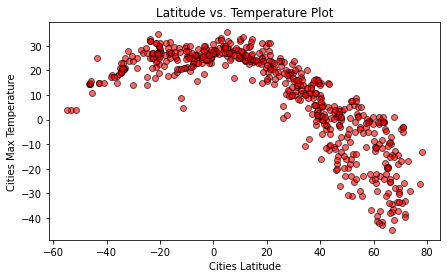

In [104]:
# Latitude vs. Temperature Plot

cities_lat = weather_df["Lat"]
cities_temp = weather_df["Max Temperature"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.6)

plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Cities Latitude')
plt.ylabel('Cities Max Temperature')

Text(0, 0.5, 'Cities Humidity')

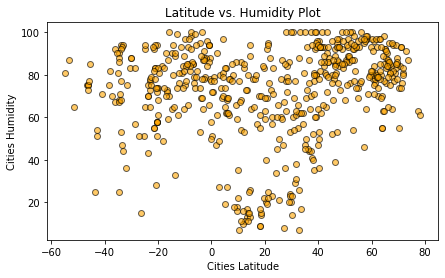

In [103]:
# Latitude vs. Humidity Plot

cities_hum = weather_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_hum, marker="o", facecolors="orange", edgecolors="black", alpha=0.6)

plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Cities Latitude')
plt.ylabel('Cities Humidity')

Text(0, 0.5, 'Cities Cloudiness')

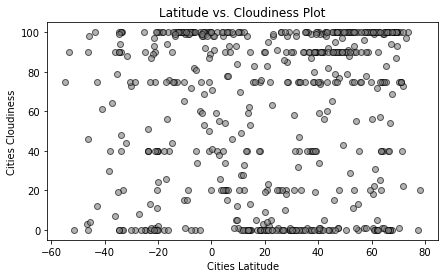

In [102]:
# Latitude vs. Cloudiness Plot

cities_cloud = weather_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_cloud, marker="o", facecolors="grey", edgecolors="black", alpha=0.6)

plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Cities Latitude')
plt.ylabel('Cities Cloudiness')

Text(0, 0.5, 'Cities Wind Speed')

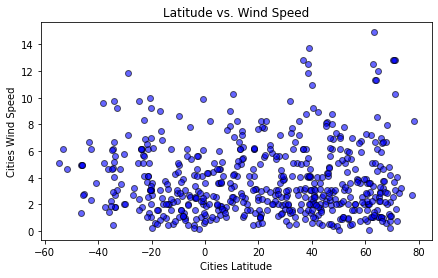

In [146]:
# Latitude vs. Wind Speed Plot

cities_wind = weather_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(cities_lat, cities_wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.6)

plt.title('Latitude vs. Wind Speed')
plt.xlabel('Cities Latitude')
plt.ylabel('Cities Wind Speed')


In [ ]:
# Latitude vs. Temperature Plot
# run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

In [85]:
north_hemp = weather_df[weather_df["Lat"] >= 0]
south_hemp = weather_df[weather_df["Lat"] <= 0]

The r-value is 0.7686585861544103


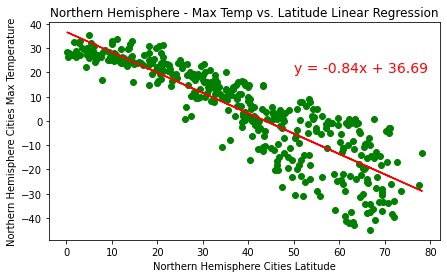

In [108]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_temp = north_hemp["Max Temperature"]

corr = round(st.pearsonr(north_cities_lat, north_cities_temp,)[0],2)
x_values = north_cities_lat
y_values = north_cities_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_temp, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Northern Hemisphere Cities Latitude')
plt.ylabel('Northern Hemisphere Cities Max Temperature')
ax1.annotate(line_eq, (50, 20), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.2803070972860263


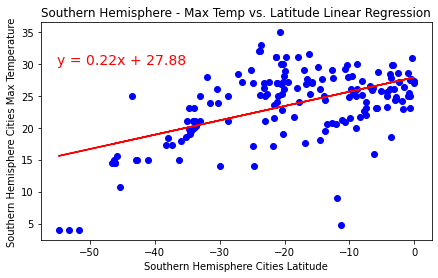

In [112]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_temp = south_hemp["Max Temperature"]

corr = round(st.pearsonr(south_cities_lat, south_cities_temp,)[0],2)
x_values = south_cities_lat
y_values = south_cities_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_temp, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Southern Hemisphere Cities Latitude')
plt.ylabel('Southern Hemisphere Cities Max Temperature')
ax1.annotate(line_eq, (-55, 30), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.2081414684533087


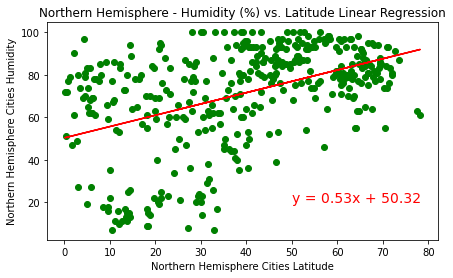

In [113]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_hum = north_hemp["Humidity"]

corr = round(st.pearsonr(north_cities_lat, north_cities_hum,)[0],2)
x_values = north_cities_lat
y_values = north_cities_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_hum, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Northern Hemisphere Cities Latitude')
plt.ylabel('Northern Hemisphere Cities Humidity')
ax1.annotate(line_eq, (50, 20), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.06452644501967204


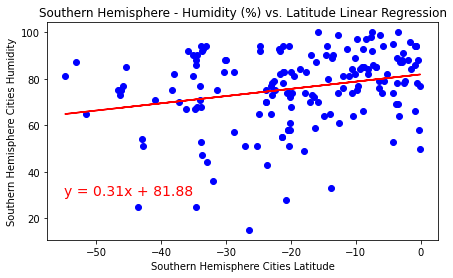

In [114]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_hum = south_hemp["Humidity"]

corr = round(st.pearsonr(south_cities_lat, south_cities_hum,)[0],2)
x_values = south_cities_lat
y_values = south_cities_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_hum, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Southern Hemisphere Cities Latitude')
plt.ylabel('Southern Hemisphere Cities Humidity')
ax1.annotate(line_eq, (-55, 30), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.04355698976667893


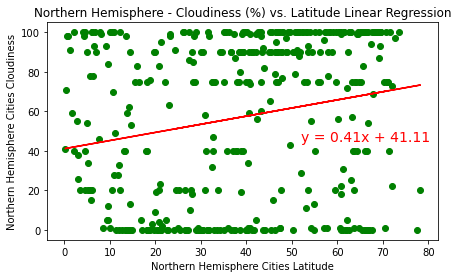

In [121]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_cloud = north_hemp["Cloudiness"]

corr = round(st.pearsonr(north_cities_lat, north_cities_cloud,)[0],2)
x_values = north_cities_lat
y_values = north_cities_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_cloud, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Northern Hemisphere Cities Latitude')
plt.ylabel('Northern Hemisphere Cities Cloudiness')
ax1.annotate(line_eq, (52, 45), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.082218986120232


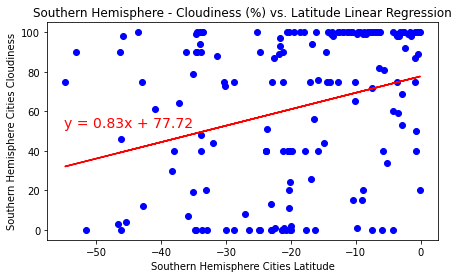

In [125]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_cloud = south_hemp["Cloudiness"]

corr = round(st.pearsonr(south_cities_lat, south_cities_cloud,)[0],2)
x_values = south_cities_lat
y_values = south_cities_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_cloud, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Southern Hemisphere Cities Latitude')
plt.ylabel('Southern Hemisphere Cities Cloudiness')
ax1.annotate(line_eq, (-55, 52), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.0014129009108515783


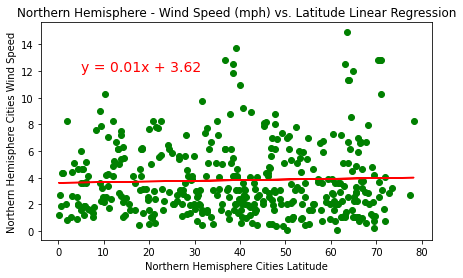

In [131]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_cities_lat = north_hemp["Lat"]
north_cities_wind = north_hemp["Wind Speed"]

corr = round(st.pearsonr(north_cities_lat, north_cities_wind,)[0],2)
x_values = north_cities_lat
y_values = north_cities_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(north_cities_lat, north_cities_wind, color="green")
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Northern Hemisphere Cities Latitude')
plt.ylabel('Northern Hemisphere Cities Wind Speed')
ax1.annotate(line_eq, (5, 12), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")

The r-value is 0.06592955028331667


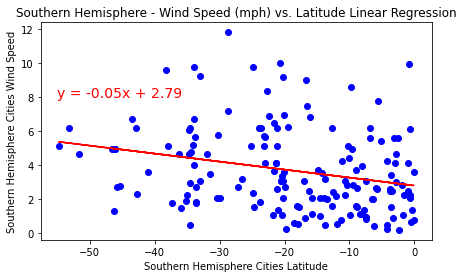

In [137]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_cities_lat = south_hemp["Lat"]
south_cities_wind = south_hemp["Wind Speed"]

corr = round(st.pearsonr(south_cities_lat, south_cities_wind,)[0],2)
x_values = south_cities_lat
y_values = south_cities_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(south_cities_lat, south_cities_wind, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Southern Hemisphere Cities Latitude')
plt.ylabel('Southern Hemisphere Cities Wind Speed')
ax1.annotate(line_eq, (-55, 8), fontsize=14, color="red")
print(f"The r-value is {rvalue**2}")